## 1. 한국어 단어 임베딩 만들기

In [1]:
from konlpy.tag import Okt
from gensim.models.word2vec import Word2Vec
from gensim.models.fasttext import FastText
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ratings_train.txt', sep='\t')
data1 = pd.read_csv('ratings_train2.txt', sep='\t')
data2 = pd.read_csv('train.csv')
data3 = pd.read_csv('test.csv')

In [3]:
data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [4]:
cols=['id' ,'document']
data = data[cols]
data1 = data1[cols]
cols=['id','raw']
data2 = data2[cols]
data3 = data3[cols]

In [5]:
len(data)

150000

In [6]:
len(data1)

200000

In [7]:
data2.columns = ['id' ,'document']
data3.columns = ['id' ,'document']

In [8]:
train_data = pd.concat([data, data1,data2,data3])
# train_data = pd.concat([data, data1])
len(train_data)

418136

In [9]:
train_data.tail()

,id,document
13621,R002153,생각지도못한 반전영화 12년 전 영화인데도 최고
13622,R029129,결말이 예측 되다가도 완전 빗나간 것 같다가 어느정도 예상에 접근하며 끝난 영화. ...
13623,R021090,여태것 본 공포영화 중 젤 쓰레기 내용은 좋은데 감정적으로 대응하는 부분이 쓸대없이...
13624,R013734,극장영화가 아니라 TV영화임! 이러한 2시간 영화를 찍을려고 해도 몇달동안 무더운 ...
13625,R050035,세 커플의 그저그런 사랑이야기인 것 같지만 사실 한 남자의 이기적인 이야기라고 보면...


In [10]:
#NULL 값 존재 유무
train_data.isnull().values.any()

True

In [11]:
train_data = train_data.dropna(how = 'any')  # NULL 값 제거
train_data.isnull().values.any()

False

In [12]:
len(train_data)

418123

In [13]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣|]","")   # 공백과 한국어를 제외한 모든 단어 제거
len(train_data)  

418123

In [14]:
#불용어 정의
stopwords = ['을','의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','과','한','하다']   

In [15]:
okt = Okt()  #Konlpy의 okt 형태소 분석기를 사용하여 단어 토큰화 진행  
tokenized_data = []  # tokenized_data 변수의 리스트 생성
for sentence in train_data['document']:   #해당 컬럼의 각각의 문장들에 대해
    temp_X = okt.morphs(sentence, norm = True, stem=True) # norm -> 기본형으로 변경해주고 단어들을 뽑아냄, 약 3시간 정도 소요 되므로 시간을 아끼기 위해선 norm = False로 설정해도 무방
    temp_X = [word for word in temp_X if not word in stopwords] # 위에서 정의한 불용어 들을 제거함
    
    
    tokenized_data.append(temp_X)

In [20]:
tokenized_data

[['아', '더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '한', '다'],
 ['교도소', '이야기', '구먼', '솔직하다', '재미', '는', '없다', '평점', '조정'],
 ['사이',
  '몬페',
  '그',
  '의',
  '익살스럽다',
  '연기',
  '가',
  '돋보이다',
  '영화',
  '스파이더맨',
  '에서',
  '늙다',
  '보이다',
  '하다',
  '커스틴',
  '던스트',
  '가',
  '너무나도',
  '이쁘다',
  '보이다'],
 ['막',
  '걸음',
  '마',
  '떼다',
  '세',
  '부터',
  '초등학교',
  '학년',
  '생인',
  '살다',
  '영화',
  'ㅋㅋㅋ',
  '별',
  '반개',
  '도',
  '아깝다',
  '움'],
 ['원작', '의', '긴장감', '을', '제대로', '살리다', '하다'],
 ['별',
  '반개',
  '도',
  '아깝다',
  '욕',
  '나오다',
  '이응경',
  '길용우',
  '연',
  '기',
  '생활',
  '이',
  '몇',
  '년',
  '인지',
  '정말',
  '발',
  '로',
  '해도',
  '그것',
  '보단',
  '낫다',
  '납치',
  '감금',
  '만',
  '반복',
  '반복',
  '이',
  '드라마',
  '는',
  '가족',
  '도',
  '없다',
  '연기',
  '못',
  '하다',
  '사람',
  '만',
  '모',
  '엿',
  '네'],
 ['액션', '이', '없다', '재미', '있다', '몇', '안되다', '영화'],
 ['왜케',
  '평점',
  '이',
  '낮다',
  '꽤',
  '볼',
  '만',
  '한',
  '데'

리뷰의 최대 길이 : 78
리뷰의 평균 길이 : 12.75612522750845


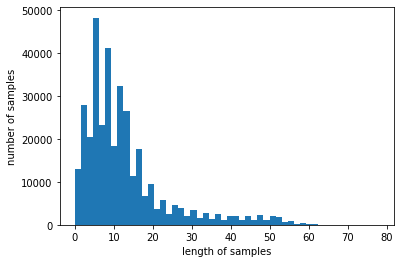

In [21]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [22]:
#FastText를 활용하여 200 차원 임베딩 모델 생성
model = FastText(sentences = tokenized_data, size = 200, window = 5, min_count = 3, workers = 4, sg = 0)

In [23]:
model.wv.vocab  # 생성된 모델의 단어 확인

{'아': <gensim.models.keyedvectors.Vocab at 0x1cdc7fdeb88>,
 '더빙': <gensim.models.keyedvectors.Vocab at 0x1cd83e1c808>,
 '진짜': <gensim.models.keyedvectors.Vocab at 0x1cd83eed388>,
 '짜증나다': <gensim.models.keyedvectors.Vocab at 0x1cd83eed1c8>,
 '목소리': <gensim.models.keyedvectors.Vocab at 0x1cd83eb67c8>,
 '흠': <gensim.models.keyedvectors.Vocab at 0x1cd83eb6188>,
 '포스터': <gensim.models.keyedvectors.Vocab at 0x1cd83eb6208>,
 '보고': <gensim.models.keyedvectors.Vocab at 0x1cd83eb6388>,
 '초딩': <gensim.models.keyedvectors.Vocab at 0x1cd83eb6d08>,
 '영화': <gensim.models.keyedvectors.Vocab at 0x1cd83eb6048>,
 '줄': <gensim.models.keyedvectors.Vocab at 0x1cd83eb6288>,
 '오버': <gensim.models.keyedvectors.Vocab at 0x1cd83eb6308>,
 '연기': <gensim.models.keyedvectors.Vocab at 0x1cd83eb6408>,
 '조차': <gensim.models.keyedvectors.Vocab at 0x1cd83eb6488>,
 '가볍다': <gensim.models.keyedvectors.Vocab at 0x1cd83eb6608>,
 '않다': <gensim.models.keyedvectors.Vocab at 0x1cd83eb6508>,
 '너': <gensim.models.keyedvectors.Voca

In [24]:
#모델 차원 벡터 학습
model.train(
    sentences = tokenized_data,
    epochs=30,
    total_examples=model.corpus_count,
    total_words=model.corpus_total_words
)  

In [26]:
model.wv.vectors.shape  # 모델 shape 확인

(27944, 200)

In [27]:
#모델 저장
from gensim.models import KeyedVectors
model.save('kor_ftt')

In [28]:
model = FastText.load('kor_ftt')

In [29]:
ft = model.wv

In [30]:
ft.vectors.shape

(27944, 200)

## 2. 컴페티션 데이터 전처리

### 1) 데이터 로드

In [25]:
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt, Komoran
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [26]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [27]:
train.head()

,id,rating,raw,chr_token,nn_token
0,R024795,1,1982년도에 이런영화가 제작이 됐다는거 자체가 놀라운거라고. 재미없다고 씨부리는것...,1 9 8 2 년 도 에 이 런 영 화 가 제 작 이 됐 다 는 거 자 체 가 놀 ...,년도 영화 제작 거 자체 거 씨 것 엄매 뱃속 정자 난자 전 리를리감 독 전구 에디...
1,R068332,1,핸드핼드기법을 적절히 써가며 현실과 환상의 대비를 확연하게 보여주는 영화,핸 드 핼 드 기 법 을 적 절 히 써 가 며 현 실 과 환 상 의 대 비 를 확 ...,핸드 핼드 기법 현실 환상 대비 영화
2,R027236,1,....엑스맨을 깔끔하게 정리를 했다는 자체가 이미 뛰어난 영화라는 것을 증명하고 있다,. . . . 엑 스 맨 을 깔 끔 하 게 정 리 를 했 다 는 자 체 가 이 미 ...,엑스맨 정리 자체 영화 것 증명
3,R050965,0,뭐 이런 쓰레기 영화가 다있냐 인물관계도 정리안해줘 줄거리도 없어 내용도 ㅉㅉ,뭐 이 런 쓰 레 기 영 화 가 다 있 냐 인 물 관 계 도 정 리 안 해 줘 줄 ...,쓰레기 영화 인물 관계 정리안 줄거리 내용 ㅉ
4,R016317,0,육식공룡중에서 빌딩보다 더큰공룡이어딧노 ㅋㅋㅋㅋㅋㅋ,육 식 공 룡 중 에 서 빌 딩 보 다 더 큰 공 룡 이 어 딧 노 ㅋ ㅋ ㅋ ㅋ ㅋ ㅋ,육식 공 룡 중 빌딩 공룡 어딧노 ㅋ ㅋ


In [28]:
test.head()

,id,raw,chr_token,nn_token
0,R009132,감독이 넘 제멋대로 자유분방(?)하게 만든거같다는...보구나서 느낌은 모지 이영화?,감 독 이 넘 제 멋 대 로 자 유 분 방 ( ? ) 하 게 만 든 거 같 다 는 ...,감독 자유 분방 느낌 모지 이영화
1,R045659,제작사와감독에게할복을요청하고싶다...일본영화의 최대망작!!!,제 작 사 와 감 독 에 게 할 복 을 요 청 하 고 싶 다 . . . 일 본 영 ...,제작사 감독 할복 요청 일본 영화 최대망작
2,R015196,드라마는 재미 있고 모든 출연자들 자알합니다만 단 한 사람 추잡스러워서 드라마 질을...,드 라 마 는 재 미 있 고 모 든 출 연 자 들 자 알 합 니 다 만 단 한 사 ...,드라마 재미 출연자 자 사람 잡 드라마 질 입술 성형 처음 때 지금 잡 서리
3,R063595,초등생인 첫째아이가 어렸을때 좋아했던 토마스.. 다시봐도 재밌다네요..둘째도 너무 ...,초 등 생 인 첫 째 아 이 가 어 렸 을 때 좋 아 했 던 토 마 스 . . 다 ...,초등 아이 때 토마스 다 아이 영화
4,R053340,중국을 보고싶다면 미모와 연기력을 다 갖춘 중국의 아이콘을 보고싶다면...,중 국 을 보 고 싶 다 면 미 모 와 연 기 력 을 다 갖 춘 중 국 의 아 이 ...,중국 미모 연기력 중국 아이콘


In [29]:
len(train)

54510

In [30]:
len(test)

13626

In [31]:
cols = ['rating','raw']
train = train[cols]
cols = ['id','raw']
test = test[cols]

In [32]:
train.head()

,rating,raw
0,1,1982년도에 이런영화가 제작이 됐다는거 자체가 놀라운거라고. 재미없다고 씨부리는것...
1,1,핸드핼드기법을 적절히 써가며 현실과 환상의 대비를 확연하게 보여주는 영화
2,1,....엑스맨을 깔끔하게 정리를 했다는 자체가 이미 뛰어난 영화라는 것을 증명하고 있다
3,0,뭐 이런 쓰레기 영화가 다있냐 인물관계도 정리안해줘 줄거리도 없어 내용도 ㅉㅉ
4,0,육식공룡중에서 빌딩보다 더큰공룡이어딧노 ㅋㅋㅋㅋㅋㅋ


In [33]:
test.head()

,id,raw
0,R009132,감독이 넘 제멋대로 자유분방(?)하게 만든거같다는...보구나서 느낌은 모지 이영화?
1,R045659,제작사와감독에게할복을요청하고싶다...일본영화의 최대망작!!!
2,R015196,드라마는 재미 있고 모든 출연자들 자알합니다만 단 한 사람 추잡스러워서 드라마 질을...
3,R063595,초등생인 첫째아이가 어렸을때 좋아했던 토마스.. 다시봐도 재밌다네요..둘째도 너무 ...
4,R053340,중국을 보고싶다면 미모와 연기력을 다 갖춘 중국의 아이콘을 보고싶다면...


### 2) 데이터 정제

In [10]:
train['raw'].nunique(), train['rating'].nunique()  # 중복데이터 여부 확인

(54480, 2)

In [11]:
train.drop_duplicates(subset=['raw'], inplace = True) # raw 열에서 중복된 내용 제거

In [12]:
len(train)

54480

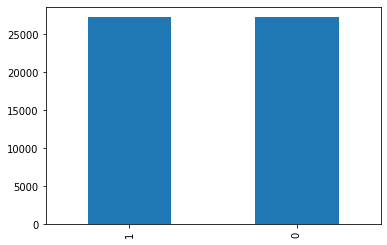

In [34]:
train['rating'].value_counts().plot(kind='bar')

In [35]:
train.groupby('rating').size().reset_index(name = 'count')

,rating,count
0,0,27255
1,1,27255


In [15]:
train.isnull().values.any()  # null값 확인

False

In [16]:
len(train)

54480

In [36]:
train['raw'] = train['raw'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣|\W+]","")  # 한글과 공백, 특수문자 제외하고 모두 제거

In [37]:
train.head()

,rating,raw
0,1,년도에 이런영화가 제작이 됐다는거 자체가 놀라운거라고. 재미없다고 씨부리는것들아 니...
1,1,핸드핼드기법을 적절히 써가며 현실과 환상의 대비를 확연하게 보여주는 영화
2,1,....엑스맨을 깔끔하게 정리를 했다는 자체가 이미 뛰어난 영화라는 것을 증명하고 있다
3,0,뭐 이런 쓰레기 영화가 다있냐 인물관계도 정리안해줘 줄거리도 없어 내용도 ㅉㅉ
4,0,육식공룡중에서 빌딩보다 더큰공룡이어딧노 ㅋㅋㅋㅋㅋㅋ


In [19]:
train['raw'].replace('',np.nan ,inplace=True) #기존 한글 리뷰가 없을 경우 공백처리 후 null 값적용
train.isnull().sum()

rating    0
raw       0
dtype: int64

In [38]:
# test 데이터 정규화
test['raw'] = test['raw'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣|\W+ ]","")
print('전처리 후  테스트 샘플 수:', len(test))

전처리 후  테스트 샘플 수: 13626


### 3) 토큰화

In [21]:
#불용어정의
stopwords = ['을','의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','과','한','하다','로']

In [39]:
okt = Okt()
# kom = Komoran()

In [40]:
#train 토큰화
train_seq = []
for sentence in train['raw']:
    text = []
    text = okt.morphs(sentence, norm = True, stem=True) #토큰화
    text = [word for word in text if not word in stopwords] # 불용어 제거
    train_seq.append(text)

In [41]:
print(train_seq[:50])

[['년도', '에', '이런', '영화', '가', '제작', '이', '돼다', '자체', '가', '놀랍다', '.', '재미없다', '씨부리다', '들다', '니', '들', '이', '엄매', '뱃속', '은', '커녕', '정자', '난자', '도', '되다', '기전', '에', '리', '를', '리', '감독', '은', '이런', '걸', '만들다', '.', '전구', '로', '치면', '에디슨', '전화기', '로치', '면', '벨', '자동차', '로', '치면', '포드', '.', '알다', '?'], ['핸드', '핼드', '기법', '을', '적절하다', '써다', '현실', '과', '환상', '의', '대비', '를', '확연', '하다', '보여주다', '영화'], ['....', '엑스맨', '을', '깔끔하다', '정리', '를', '하다', '자체', '가', '이미', '뛰어나다', '영화', '라는', '것', '을', '증명', '하고', '있다'], ['뭐', '이렇다', '쓰레기', '영화', '가', '다', '있다', '인물관계도', '정리', '안해', '주다', '줄거리', '도', '없다', '내용', '도', 'ㅉㅉ'], ['육식', '공룡', '중', '에서', '빌딩', '보다', '더', '크다', '공룡', '이다', '딧노', 'ㅋㅋㅋ'], ['점도', '아깝다', '.', '점', '은', '없다', '심사', '위원', '자기', '들이다', '하다', '아무리', '연습', '때', '잘', '하다', '실전', '(', '무대', ')', '에서', '못', '하다', '꽝', '이라', '햇', '늘다', '무대', '에선', '불안정하다', '그땐', '또', '이야기', '가', '달라짐', '가능성', '을', '보고', '뽑다', '.', '장난', '치다', '건가', '?'], ['사소하다', '이야기', '조차', '눈', '을', '떼다', '없다', '만들다', 

In [42]:
#test 데이터 토큰화
test_seq = []
for sentence in test['raw']:
    text = []
    text = okt.morphs(sentence, norm=True, stem=True) #토큰화
#     text = [word for word in text if not word in stopwords] # 불용어 제거
    test_seq.append(text)

### 4) 정수 인코딩

In [43]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_seq)
print(tokenizer.word_index)

{'.': 1, '이': 2, '영화': 3, '하다': 4, '보다': 5, '의': 6, '에': 7, '가': 8, '을': 9, '..': 10, '도': 11, '들': 12, '은': 13, '는': 14, '를': 15, '...': 16, '없다': 17, '있다': 18, '이다': 19, '한': 20, '좋다': 21, '?': 22, '되다': 23, '다': 24, '적': 25, '으로': 26, '같다': 27, '것': 28, '너무': 29, '로': 30, '아니다': 31, '만': 32, '진짜': 33, '과': 34, '에서': 35, '정말': 36, '연기': 37, '않다': 38, '!': 39, '점': 40, '나오다': 41, '인': 42, '스토리': 43, '그': 44, '만들다': 45, '사람': 46, '생각': 47, '평점': 48, '재밌다': 49, '드라마': 50, '내': 51, '안': 52, '나': 53, '와': 54, '못': 55, '최고': 56, '배우': 57, '~': 58, '고': 59, '감독': 60, '때': 61, '더': 62, '보고': 63, '게': 64, '까지': 65, '왜': 66, '중': 67, '말': 68, '하고': 69, '내용': 70, '감동': 71, '이렇다': 72, 'ㅋㅋ': 73, '시간': 74, '주다': 75, '....': 76, '들다': 77, '아': 78, '수': 79, 'ㅋㅋㅋ': 80, '거': 81, '가다': 82, '그냥': 83, '요': 84, '자다': 85, '아깝다': 86, '좀': 87, '작품': 88, '마지막': 89, '쓰레기': 90, '뭐': 91, '사랑': 92, '모르다': 93, '그렇다': 94, '알다': 95, '정도': 96, '주인공': 97, '장면': 98, '하나': 99, '재미': 100, '네': 101, '처음': 102, '!!': 103, 

In [44]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수 카운트
total_freq = 0 # 훈련 데이터 전체 단어 빈도수 총 합
rare_freq =0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수 총합

for key, value in tokenizer.word_counts.items():  # word_counts.itmes()가 dict 형태로 되어 있으며, 각각의 key와 갑들에 대해
    total_freq = total_freq + value               # 총 빈도수 계산
    
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합의 크기:' , total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s' %(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합의 크기: 37424
등장 빈도가 2번 이하인 희귀 단어의 수: 20713
단어 집합에서 희귀 단어의 비율: 55.34683625480975
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.8735150163293677


In [45]:
vocab_size = total_cnt - rare_cnt + 1 # 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거. 0번 패딩 토큰을 고려하여 +1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 16712


In [46]:
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(train_seq)
train_seq = tokenizer.texts_to_sequences(train_seq)
word2idx = tokenizer.word_index
len(word2idx)

37424

In [47]:
test_seq = tokenizer.texts_to_sequences(test_seq)
len(test_seq)

13626

In [48]:
labels = np.array(train['rating'])
labels

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

### 5) 빈 샘플 제거

In [65]:
drop_train = [index for index, sentence in enumerate(train_seq) if len(sentence) < 1]
drop_train

[2651, 22032, 24701]

In [66]:
train_seq = np.delete(train_seq, drop_train, axis=0)
len(train_seq)

54477

In [67]:
labels = np.delete(labels, drop_train, axis=0)
labels

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

### 6) 패딩

리뷰의 최대 길이 : 94
리뷰의 평균 길이 : 24.75998899284535


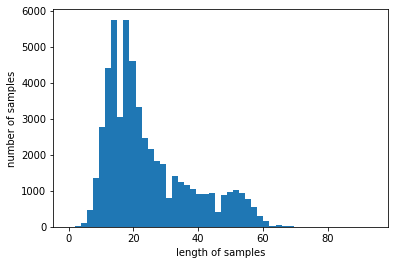

In [49]:
print('리뷰의 최대 길이 :' , max(len(x) for x in train_seq))
print('리뷰의 평균 길이 :' , sum(map(len, train_seq))/len(train_seq))
plt.hist([len(s) for s in train_seq], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [50]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s' %(max_len, (cnt/len(nested_list))*100))

In [51]:
max_len = 94
below_threshold_len(max_len, train_seq)

전체 샘플 중 길이가 94 이하인 샘플의 비율: 100.0


In [52]:
train_seq = pad_sequences(train_seq, maxlen=max_len)
test_seq = pad_sequences(test_seq, maxlen=max_len)

In [53]:
train_seq

array([[   0,    0,    0, ...,    1,   95,   22],
       [   0,    0,    0, ...,    4,  168,    3],
       [   0,    0,    0, ..., 2930,   69,   18],
       ...,
       [   0,    0,    0, ...,   31,   27, 1430],
       [   0,    0,    0, ...,    4,  107,    1],
       [   0,    0,    0, ...,  869,   23,   80]])

In [54]:
test_seq

array([[    0,     0,     0, ...,   112,   141,    22],
       [    0,     0,     0, ...,  1712,   291,   255],
       [    0,     0,     0, ...,   501, 13511,    76],
       ...,
       [    0,     0,     0, ...,    32,   122,     3],
       [    0,     0,     0, ...,    15,   752,   103],
       [    0,     0,     0, ...,    21,    28,    27]])

## 3. 영화 리뷰 데이터 감성 분류

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_seq, labels, test_size=0.2, stratify=labels)

In [56]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, GRU, CuDNNGRU, CuDNNLSTM, BatchNormalization
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D, MaxPooling1D
from keras.models import Model, load_model, Sequential
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras import backend as K
from keras.engine import InputSpec, Layer
from keras.optimizers import Adam, RMSprop
from keras import activations, initializers, regularizers, constraints
from keras.utils.conv_utils import conv_output_length
from keras.regularizers import l2
from keras.constraints import maxnorm
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping

Using TensorFlow backend.


In [59]:
from gensim.models import KeyedVectors
from gensim.models.fasttext import FastText

In [66]:
ft = FastText.load('kor2_ftt')  #임베딩된 사전 불러오기

In [67]:
ft.wv.vectors.shape

(27944, 200)

In [68]:
ft = ft.wv
ft.vectors.shape

(27944, 200)

In [69]:
embed_matrix = np.zeros((vocab_size, 200))   # 행(vocab_size)  * 열(사전 단어 임베딩 차원) 만큼 0 행렬 생성
np.shape(embed_matrix)

(16712, 200)

In [70]:
def get_vector(word):  #train 데이터의 단어가 모델안에 있으면 벡터로 변환하는 함수 생성
    if word in ft: 
        return ft[word]
    else:
        return None

In [71]:
embed_dim = 200
for word, i in word2idx.items():   
    if i < vocab_size:                       #dict 안에 있는 단어의 정수가 vocab_size보다 작으면
        embed_vector = get_vector(word)      # 모델에서 단어 벡터를 불러와서 embed_vector에 저장
        if embed_vector is not None:         # embed_vector 이 none가 아니면
            embed_matrix[i] = embed_vector   # 위의 정의된 embed_matrix의 i 번째에 추가

In [71]:
embed_matrix[:10]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.78866664e-03, -4.75060521e-03, -4.38948395e-03, ...,
         2.97020283e-03, -2.01598764e-03,  3.95123760e-04],
       [ 3.68992865e-01,  3.71631670e+00,  9.58735347e-01, ...,
        -5.99062264e-01, -9.72028792e-01, -1.21905851e+00],
       ...,
       [-1.77442431e+00,  1.80149317e+00,  4.19697857e+00, ...,
        -1.53823709e+00, -4.35783297e-01, -6.62196279e-02],
       [-1.35924089e+00,  2.48067021e+00,  3.42687100e-01, ...,
         1.22569251e+00, -6.28502965e-01,  3.77729654e+00],
       [-2.02159691e+00,  1.21565151e+00, -1.18881606e-01, ...,
         2.92136788e+00, -1.47229075e+00, -1.37401867e+00]])

In [72]:
#embedding 층 정의
emb = Embedding(input_dim=vocab_size, output_dim=embed_dim,
                trainable=False, weights=[embed_matrix])  # 가중치를 embed_matrix에서 불러오고 추가적인 업데이트를 하지 않음

In [82]:
def build_model1(lr=0.0, lr_d=0.0, units=0, spatial_dr=0.0, kernel_size1=3, kernel_size2=2, dense_units=128, dr=0.1, conv_size=32):
    file_path = "best_model.hdf5"
    check_point = ModelCheckpoint(file_path, monitor = "val_loss", verbose = 1,
                                  save_best_only = True, mode = "min")
    early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)
    
    inp = Input(shape = (max_len,))
    x = Embedding(input_dim=vocab_size, output_dim=embed_dim)(inp)
    x1 = SpatialDropout1D(spatial_dr)(x)

    x_gru = Bidirectional(GRU(units, return_sequences = True))(x1)
    x1 = Conv1D(conv_size, kernel_size=kernel_size1, padding='valid', kernel_initializer='he_uniform')(x_gru)
    avg_pool1_gru = GlobalAveragePooling1D()(x1)
    max_pool1_gru = GlobalMaxPooling1D()(x1)
    
    x3 = Conv1D(conv_size, kernel_size=kernel_size2, padding='valid', kernel_initializer='he_uniform')(x_gru)
    avg_pool3_gru = GlobalAveragePooling1D()(x3)
    max_pool3_gru = GlobalMaxPooling1D()(x3)
    
    x_lstm = Bidirectional(LSTM(units, return_sequences = True))(x1)
    x1 = Conv1D(conv_size, kernel_size=kernel_size1, padding='valid', kernel_initializer='he_uniform')(x_lstm)
    avg_pool1_lstm = GlobalAveragePooling1D()(x1)
    max_pool1_lstm = GlobalMaxPooling1D()(x1)
    
    x3 = Conv1D(conv_size, kernel_size=kernel_size2, padding='valid', kernel_initializer='he_uniform')(x_lstm)
    avg_pool3_lstm = GlobalAveragePooling1D()(x3)
    max_pool3_lstm = GlobalMaxPooling1D()(x3)
    
    x = concatenate([avg_pool1_gru, max_pool1_gru, avg_pool3_gru, max_pool3_gru,avg_pool1_lstm, max_pool1_lstm, avg_pool3_lstm, max_pool3_lstm])
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(dense_units, activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(int(dense_units / 2), activation='relu') (x))
    x = Dense(1, activation = "sigmoid")(x)
    model = Model(inputs = inp, outputs = x)
    model.compile(loss = "binary_crossentropy", optimizer = RMSprop(lr = lr, decay = lr_d), metrics = ["acc"])
    history = model.fit(x_train, y_train, batch_size = 64, epochs = 20, validation_split=0.1, verbose = 1, callbacks = [check_point, early_stop])
    model = load_model(file_path)
    return model

In [83]:
model1 = build_model1(lr = 1e-3, lr_d = 1e-10, units = 200, spatial_dr = 0.0, kernel_size1=3, kernel_size2=2, dense_units=128, dr=0.0, conv_size=64)

C:\Users\siras\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 39247 samples, validate on 4361 samples
Epoch 1/20
39247/39247 [==============================] - 206s 5ms/step - loss: 0.4081 - acc: 0.8116 - val_loss: 0.4931 - val_acc: 0.8136

Epoch 00001: val_loss improved from inf to 0.49306, saving model to best_model.hdf5
Epoch 2/20
39247/39247 [==============================] - 201s 5ms/step - loss: 0.3031 - acc: 0.8704 - val_loss: 0.4742 - val_acc: 0.7973

Epoch 00002: val_loss improved from 0.49306 to 0.47416, saving model to best_model.hdf5
Epoch 3/20
39247/39247 [==============================] - 203s 5ms/step - loss: 0.2559 - acc: 0.8949 - val_loss: 0.8186 - val_acc: 0.6911

Epoch 00003: val_loss did not improve from 0.47416
Epoch 4/20
39247/39247 [==============================] - 205s 5ms/step - loss: 0.2089 - acc: 0.9165 - val_loss: 0.3440 - val_acc: 0.8528

Epoch 00004: val_loss improved from 0.47416 to 0.34398, saving model to best_model.hdf5
Epoch 5/20
39247/39247 [==============================] - 203s 5ms/step - loss: 0.16

C:\Users\siras\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [51]:
model2 = build_model1(lr = 1e-3, lr_d = 1e-10, units = 128, spatial_dr = 0.1, kernel_size1=3, kernel_size2=2, dense_units=128, dr=0.1, conv_size=32)

Train on 39225 samples, validate on 4359 samples
Epoch 1/20
39225/39225 [==============================] - 143s 4ms/step - loss: 0.5355 - acc: 0.7278 - val_loss: 0.4756 - val_acc: 0.7747

Epoch 00001: val_loss improved from inf to 0.47556, saving model to best_model.hdf5
Epoch 2/20
39225/39225 [==============================] - 137s 4ms/step - loss: 0.4247 - acc: 0.8001 - val_loss: 0.4244 - val_acc: 0.7954

Epoch 00002: val_loss improved from 0.47556 to 0.42442, saving model to best_model.hdf5
Epoch 3/20
39225/39225 [==============================] - 137s 4ms/step - loss: 0.3779 - acc: 0.8278 - val_loss: 0.3980 - val_acc: 0.8135

Epoch 00003: val_loss improved from 0.42442 to 0.39801, saving model to best_model.hdf5
Epoch 4/20
39225/39225 [==============================] - 138s 4ms/step - loss: 0.3356 - acc: 0.8499 - val_loss: 0.5052 - val_acc: 0.7878

Epoch 00004: val_loss did not improve from 0.39801
Epoch 5/20
39225/39225 [==============================] - 140s 4ms/step - loss: 0.29

In [52]:
def build_model2(lr=0.0, lr_d=0.0, units=0, spatial_dr=0.0, kernel_size1=3, kernel_size2=2, dense_units=128, dr=0.1, conv_size=32):
    file_path = "best_model.hdf5"
    check_point = ModelCheckpoint(file_path, monitor = "val_loss", verbose = 1,
                                  save_best_only = True, mode = "min")
    early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)
    inp = Input(shape = (max_len,))
    x = Embedding(input_dim=vocab_size, output_dim=embed_dim,trainable=False, weights=[embed_matrix])(inp)
    x1 = SpatialDropout1D(spatial_dr)(x)
    
    x_gru = Bidirectional(GRU(units, return_sequences = True))(x1)
    x_lstm = Bidirectional(LSTM(units, return_sequences = True))(x1)
    
    x_conv1 = Conv1D(conv_size, kernel_size=kernel_size1, padding='valid', kernel_initializer='he_uniform')(x_gru)
    avg_pool1_gru = GlobalAveragePooling1D()(x_conv1)
    max_pool1_gru = GlobalMaxPooling1D()(x_conv1)
    
    x_conv2 = Conv1D(conv_size, kernel_size=kernel_size2, padding='valid', kernel_initializer='he_uniform')(x_gru)
    avg_pool2_gru = GlobalAveragePooling1D()(x_conv2)
    max_pool2_gru = GlobalMaxPooling1D()(x_conv2)
    
    x_conv3 = Conv1D(conv_size, kernel_size=kernel_size1, padding='valid', kernel_initializer='he_uniform')(x_lstm)
    avg_pool1_lstm = GlobalAveragePooling1D()(x_conv3)
    max_pool1_lstm = GlobalMaxPooling1D()(x_conv3)
    
    x_conv4 = Conv1D(conv_size, kernel_size=kernel_size2, padding='valid', kernel_initializer='he_uniform')(x_lstm)
    avg_pool2_lstm = GlobalAveragePooling1D()(x_conv4)
    max_pool2_lstm = GlobalMaxPooling1D()(x_conv4)
    
    x = concatenate([avg_pool1_gru, max_pool1_gru, avg_pool2_gru, max_pool2_gru,avg_pool1_lstm, max_pool1_lstm, avg_pool2_lstm, max_pool2_lstm])
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(dense_units, activation='relu') (x))
    x = BatchNormalization()(x)
    x = Dropout(dr)(Dense(int(dense_units / 2), activation='relu') (x))
    x = Dense(1, activation = "sigmoid")(x)
    model = Model(inputs = inp, outputs = x)
    
    model.compile(loss = "binary_crossentropy", optimizer = RMSprop(lr = lr, decay = lr_d), metrics = ["acc"])
    history = model.fit(x_train, y_train, batch_size = 64, epochs = 20, validation_split=0.1, 
                        verbose = 1, callbacks = [check_point, early_stop])
    model = load_model(file_path)
    return model

In [53]:
model3 = build_model2(lr = 1e-4, lr_d = 0, units = 100, spatial_dr = 0.2, kernel_size1=4, kernel_size2=3, dense_units=50, dr=0.1, conv_size=50)

Train on 39225 samples, validate on 4359 samples
Epoch 1/20
39225/39225 [==============================] - 144s 4ms/step - loss: 0.6547 - acc: 0.6241 - val_loss: 0.5700 - val_acc: 0.6999

Epoch 00001: val_loss improved from inf to 0.57001, saving model to best_model.hdf5
Epoch 2/20
39225/39225 [==============================] - 135s 3ms/step - loss: 0.5803 - acc: 0.6885 - val_loss: 0.5233 - val_acc: 0.7369

Epoch 00002: val_loss improved from 0.57001 to 0.52329, saving model to best_model.hdf5
Epoch 3/20
39225/39225 [==============================] - 137s 3ms/step - loss: 0.5390 - acc: 0.7228 - val_loss: 0.4972 - val_acc: 0.7550

Epoch 00003: val_loss improved from 0.52329 to 0.49720, saving model to best_model.hdf5
Epoch 4/20
39225/39225 [==============================] - 137s 3ms/step - loss: 0.5058 - acc: 0.7481 - val_loss: 0.4753 - val_acc: 0.7676

Epoch 00004: val_loss improved from 0.49720 to 0.47525, saving model to best_model.hdf5
Epoch 5/20
39225/39225 [=======================

In [55]:
model4 = build_model2(lr = 1e-3, lr_d = 0, units = 64, spatial_dr = 0.2, kernel_size1=3, kernel_size2=3, dense_units=64, dr=0.3, conv_size=32)

Train on 39225 samples, validate on 4359 samples
Epoch 1/20
39225/39225 [==============================] - 133s 3ms/step - loss: 0.5856 - acc: 0.6921 - val_loss: 0.4980 - val_acc: 0.7614

Epoch 00001: val_loss improved from inf to 0.49797, saving model to best_model.hdf5
Epoch 2/20
39225/39225 [==============================] - 132s 3ms/step - loss: 0.4640 - acc: 0.7804 - val_loss: 0.4540 - val_acc: 0.7903

Epoch 00002: val_loss improved from 0.49797 to 0.45397, saving model to best_model.hdf5
Epoch 3/20
39225/39225 [==============================] - 130s 3ms/step - loss: 0.4159 - acc: 0.8082 - val_loss: 0.3977 - val_acc: 0.8229

Epoch 00003: val_loss improved from 0.45397 to 0.39766, saving model to best_model.hdf5
Epoch 4/20
39225/39225 [==============================] - 130s 3ms/step - loss: 0.3858 - acc: 0.8253 - val_loss: 0.4320 - val_acc: 0.8114

Epoch 00004: val_loss did not improve from 0.39766
Epoch 5/20
39225/39225 [==============================] - 130s 3ms/step - loss: 0.35

In [56]:
model5 = build_model2(lr = 1e-3, lr_d = 1e-7, units = 64, spatial_dr = 0.2, kernel_size1=3, kernel_size2=3, dense_units=64, dr=0.4, conv_size=64)

Train on 39225 samples, validate on 4359 samples
Epoch 1/20
39225/39225 [==============================] - 137s 4ms/step - loss: 0.6034 - acc: 0.6845 - val_loss: 0.4649 - val_acc: 0.7805

Epoch 00001: val_loss improved from inf to 0.46489, saving model to best_model.hdf5
Epoch 2/20
39225/39225 [==============================] - 136s 3ms/step - loss: 0.4724 - acc: 0.7770 - val_loss: 0.4232 - val_acc: 0.8107

Epoch 00002: val_loss improved from 0.46489 to 0.42321, saving model to best_model.hdf5
Epoch 3/20
39225/39225 [==============================] - 134s 3ms/step - loss: 0.4241 - acc: 0.8061 - val_loss: 0.3970 - val_acc: 0.8192

Epoch 00003: val_loss improved from 0.42321 to 0.39700, saving model to best_model.hdf5
Epoch 4/20
39225/39225 [==============================] - 134s 3ms/step - loss: 0.3900 - acc: 0.8228 - val_loss: 0.3990 - val_acc: 0.8252

Epoch 00004: val_loss did not improve from 0.39700
Epoch 5/20
39225/39225 [==============================] - 136s 3ms/step - loss: 0.36

In [73]:
pred1 = model1.predict(test_seq, batch_size = 128, verbose = 1)
pred = pred1
pred2 = model2.predict(test_seq, batch_size = 128, verbose = 1)
pred += pred2
pred3 = model3.predict(test_seq, batch_size = 128, verbose = 1)
pred += pred3
pred4 = model4.predict(test_seq, batch_size = 128, verbose = 1)
pred += pred4
pred5 = model5.predict(test_seq, batch_size = 128, verbose = 1)
pred += pred5

13626/13626 [==============================] - 5s 332us/step


In [73]:
model = Sequential()
model.add(emb)
# model.add(Embedding(input_dim=vocab_size, output_dim=embed_dim))
model.add(Bidirectional(LSTM(200)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 200)         3342400   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 400)               641600    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 401       
Total params: 3,984,401
Trainable params: 642,001
Non-trainable params: 3,342,400
_________________________________________________________________


In [61]:
input = Input(shape=(max_len,))
net = Embedding(input_dim=vocab_size, output_dim=embed_dim,trainable=True, weights=[embed_matrix])(input)
net = Dropout(0.2)(net)
net = BatchNormalization()(net)

net = Conv1D(32, 7, padding='same', activation='relu')(net)
net = BatchNormalization()(net)
net = Conv1D(32, 3, padding='same', activation='relu')(net)
net = BatchNormalization()(net)
net = Conv1D(32, 3, padding='same', activation='relu')(net)
net = BatchNormalization()(net)
net = Conv1D(32, 3, padding='same', activation='relu')(net)
net1 = BatchNormalization()(net)

net = Conv1D(2, 1)(net)
net = GlobalAveragePooling1D()(net)
output = Dense(1, activation = "sigmoid")(net)
model = Model(inputs = input, outputs = output)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 69)                0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 69, 100)           1643900   
_________________________________________________________________
dropout_8 (Dropout)          (None, 69, 100)           0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 69, 100)           400       
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 69, 32)            22432     
_________________________________________________________________
batch_normalization_8 (Batch (None, 69, 32)            128       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 69, 32)            3104

In [77]:
def lstm_model(conv_layers = 2, max_dilation_rate = 3):
    inp = Input(shape=(max_len, ))
    x = Embedding(input_dim=vocab_size, output_dim=embed_dim,trainable=True, weights=[embed_matrix])(inp)
    x = Dropout(0.1)(x)
    x = Conv1D(1*embed_dim, kernel_size = 3)(x)
    prefilt = Conv1D(1*embed_dim, kernel_size = 3)(x)
    x = prefilt
    for strides in [1, 1, 2]:
        x = Conv1D(32*2**(strides), strides = strides, kernel_regularizer=l2(4e-6), bias_regularizer=l2(4e-6), kernel_size=3, kernel_constraint=maxnorm(10), bias_constraint=maxnorm(10))(x)
    x_f = LSTM(64, kernel_regularizer=l2(4e-6), bias_regularizer=l2(4e-6), kernel_constraint=maxnorm(10), bias_constraint=maxnorm(10))(x)  
    x_b = LSTM(32, kernel_regularizer=l2(4e-6), bias_regularizer=l2(4e-6), kernel_constraint=maxnorm(10), bias_constraint=maxnorm(10))(x)
    x = concatenate([x_f, x_b])
    x = Dropout(0.2)(x)
    x = Dense(32, activation="relu")(x)
#     x = Dropout(0.1)(x)
    x = Dense(1, activation="sigmoid")(x)
    model = Model(inputs=inp, outputs=x)

    return model

model = lstm_model()
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 69)           0                                            
__________________________________________________________________________________________________
embedding_13 (Embedding)        (None, 69, 100)      1643900     input_10[0][0]                   
__________________________________________________________________________________________________
dropout_13 (Dropout)            (None, 69, 100)      0           embedding_13[0][0]               
__________________________________________________________________________________________________
conv1d_27 (Conv1D)              (None, 67, 100)      30100       dropout_13[0][0]                 
____________________________________________________________________________________________

In [90]:
model=Sequential()
model.add(Embedding(vocab_size,200,mask_zero=True))
# model.add(emb)
model.add(LSTM(200,dropout=0.3, recurrent_dropout=0.3,return_sequences=True))
model.add(LSTM(200,dropout=0.4, recurrent_dropout=0.4,return_sequences=False))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 200)         3342400   
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 200)         320800    
_________________________________________________________________
lstm_5 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 201       
Total params: 3,984,201
Trainable params: 3,984,201
Non-trainable params: 0
_________________________________________________________________


In [88]:
model= Sequential()
model.add(emb)
model.add(Dropout(0.2))
model.add(Conv1D(128,kernel_size=3,padding='same',activation='relu',strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 200)         3342400   
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 200)         0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 128)         76928     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [108]:
# model= Sequential()
# model.add(emb)
# model.add(Conv1D(64,kernel_size=3,padding='same',activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Dropout(0.25))
# model.add(GRU(128))
# model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1,activation='sigmoid'))
# model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 100)         1643900   
_________________________________________________________________
conv1d_15 (Conv1D)           (None, None, 64)          19264     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, None, 64)          0         
_________________________________________________________________
gru_4 (GRU)                  (None, 128)               74112     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)              

In [60]:
# model = Sequential()

# model.add(emb)
# model.add(SpatialDropout1D(0.25))
# model.add(Bidirectional(GRU(128,return_sequences=True)))
# model.add(Bidirectional(GRU(64,return_sequences=False)))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))
# model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 100)         1643900   
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, None, 100)         0         
_________________________________________________________________
bidirectional_9 (Bidirection (None, None, 256)         175872    
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 128)               123264    
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
Total params: 1,943,165
Trainable params: 1,943,165
Non-trainable params: 0
____________________________________________

In [146]:
# model = Sequential()
# model.add(emb)
# # model.add(SpatialDropout1D(0.2))
# model.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))
# # model.add(MaxPooling1D(2))
# model.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling1D(2))
# model.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))
# model.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))
# model.add(GlobalMaxPooling1D())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 100)         1643900   
_________________________________________________________________
conv1d_44 (Conv1D)           (None, None, 64)          19264     
_________________________________________________________________
conv1d_45 (Conv1D)           (None, None, 64)          12352     
_________________________________________________________________
max_pooling1d_24 (MaxPooling (None, None, 64)          0         
_________________________________________________________________
conv1d_46 (Conv1D)           (None, None, 64)          12352     
_________________________________________________________________
conv1d_47 (Conv1D)           (None, None, 64)          12352     
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 64)              

In [164]:
# model = Sequential()
# model.add(emb)
# model.add(Dropout(0.2))
# model.add(Conv1D(128, 3, padding='valid', activation='relu'))
# model.add(GlobalMaxPooling1D())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))
# model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 100)         1643900   
_________________________________________________________________
dropout_19 (Dropout)         (None, None, 100)         0         
_________________________________________________________________
conv1d_60 (Conv1D)           (None, None, 128)         38528     
_________________________________________________________________
global_max_pooling1d_10 (Glo (None, 128)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 1)               

In [91]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [92]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=20, callbacks=[es, mc],batch_size=64, validation_split=0.2)
# history = model.fit(x_train, y_train, epochs=20, callbacks=[es, mc],batch_size=64, validation_data=[x_test, y_test])

C:\Users\siras\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 34886 samples, validate on 8722 samples
Epoch 1/20
34886/34886 [==============================] - 129s 4ms/step - loss: 0.4067 - acc: 0.8167 - val_loss: 0.4141 - val_acc: 0.8168

Epoch 00001: val_acc improved from -inf to 0.81679, saving model to best_model.h5
Epoch 2/20
34886/34886 [==============================] - 125s 4ms/step - loss: 0.3222 - acc: 0.8656 - val_loss: 0.3836 - val_acc: 0.8459

Epoch 00002: val_acc improved from 0.81679 to 0.84591, saving model to best_model.h5
Epoch 3/20
34886/34886 [==============================] - 126s 4ms/step - loss: 0.2940 - acc: 0.8794 - val_loss: 0.3512 - val_acc: 0.8441

Epoch 00003: val_acc did not improve from 0.84591
Epoch 4/20
34886/34886 [==============================] - 127s 4ms/step - loss: 0.2745 - acc: 0.8879 - val_loss: 0.3592 - val_acc: 0.8520

Epoch 00004: val_acc improved from 0.84591 to 0.85198, saving model to best_model.h5
Epoch 5/20
34886/34886 [==============================] - 126s 4ms/step - loss: 0.2558 - acc:

In [93]:
loaded_model = load_model('best_model.h5')

C:\Users\siras\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [94]:
print('\n 테스트 정확도: %.4f' %(loaded_model.evaluate(x_test, y_test)[1]))

10902/10902 [==============================] - 18s 2ms/step

 테스트 정확도: 0.8619


In [95]:
# pred = loaded_model.predict_classes(test_seq)
# pred = pred.flatten()

pred = model.predict(test_seq)
pred = pred.flatten()

In [96]:
# pred_np = np.reshape([pred], (len(pred)))

In [97]:
submit = pd.DataFrame({'id':test.id, 'pred' : pred})
submit.head()

,id,pred
0,R009132,0
1,R045659,1
2,R015196,0
3,R063595,1
4,R053340,0


In [86]:
submit['pred'] = np.where(submit['pred'] > 0.5, 1, 0)
submit.head()

,id,pred
0,R009132,0
1,R045659,1
2,R015196,0
3,R063595,1
4,R053340,1


In [98]:
submit.to_csv('submit_20.csv', index=False)

### 3.앙상블

In [1]:
import pandas as pd
import numpy as np

In [22]:
d1 = pd.read_csv('submit/submit_12.csv')
d2 = pd.read_csv('submit/submit_13.csv')
d3 = pd.read_csv('submit/submit_14.csv')
d4 = pd.read_csv('submit/submit_eight.csv')
d5 = pd.read_csv('submit/submit_eleven.csv')
d6 = pd.read_csv('submit/submit_night.csv')
d7 = pd.read_csv('submit/submit_nine.csv')
d8 = pd.read_csv('submit/submit_seven.csv')
d9 = pd.read_csv('submit/submit_ten.csv')

In [23]:
data = pd.merge(d1, d2, on='id', how='outer')
data = pd.merge(data, d3, on='id', how='outer')
data = pd.merge(data, d4, on='id', how='outer')
data = pd.merge(data, d5, on='id', how='outer')
data = pd.merge(data, d6, on='id', how='outer')
data = pd.merge(data, d7, on='id', how='outer')
data = pd.merge(data, d8, on='id', how='outer')
data = pd.merge(data, d9, on='id', how='outer')
data

,id,pred_x,pred_y,pred_x,pred_y,pred_x,pred_y,pred_x,pred_y,pred
0,R009132,0,0,0,0,0,0,0,0,0
1,R045659,0,0,0,0,0,0,0,0,0
2,R015196,0,0,0,0,0,0,0,0,1
3,R063595,1,1,1,1,1,1,1,1,1
4,R053340,1,1,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
13621,R002153,1,1,1,1,1,1,1,1,1
13622,R029129,0,1,0,0,0,0,0,0,1
13623,R021090,0,0,0,0,0,0,1,1,0
13624,R013734,0,0,0,1,1,1,1,1,0


In [24]:
data['mean'] = data.mean(axis=1)
data

,id,pred_x,pred_y,pred_x,pred_y,pred_x,pred_y,pred_x,pred_y,pred,mean
0,R009132,0,0,0,0,0,0,0,0,0,0.000000
1,R045659,0,0,0,0,0,0,0,0,0,0.000000
2,R015196,0,0,0,0,0,0,0,0,1,0.111111
3,R063595,1,1,1,1,1,1,1,1,1,1.000000
4,R053340,1,1,1,1,1,0,1,1,1,0.888889
...,...,...,...,...,...,...,...,...,...,...,...
13621,R002153,1,1,1,1,1,1,1,1,1,1.000000
13622,R029129,0,1,0,0,0,0,0,0,1,0.222222
13623,R021090,0,0,0,0,0,0,1,1,0,0.222222
13624,R013734,0,0,0,1,1,1,1,1,0,0.555556


In [25]:
cols=['id', 'mean']
submit = data[cols]
submit

,id,mean
0,R009132,0.000000
1,R045659,0.000000
2,R015196,0.111111
3,R063595,1.000000
4,R053340,0.888889
...,...,...
13621,R002153,1.000000
13622,R029129,0.222222
13623,R021090,0.222222
13624,R013734,0.555556


In [26]:
submit.columns =['id', 'pred']
submit

,id,pred
0,R009132,0.000000
1,R045659,0.000000
2,R015196,0.111111
3,R063595,1.000000
4,R053340,0.888889
...,...,...
13621,R002153,1.000000
13622,R029129,0.222222
13623,R021090,0.222222
13624,R013734,0.555556


In [21]:
submit['pred'] = submit['pred'] / 9
submit['pred'] = np.where(submit['pred'] > 0.5, 1, 0)
submit

C:\Users\siras\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\siras\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,pred
0,R009132,0
1,R045659,0
2,R015196,0
3,R063595,0
4,R053340,0
...,...,...
13621,R002153,0
13622,R029129,0
13623,R021090,0
13624,R013734,0
